In [13]:
import glob
import pandas as pd
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, "src")))
from utils import Utils
from reports import Reports

In [ ]:
# HNM Labels

substrate_path = None
op_path = r"Z:\__AdvancedTechnologyBackup\07_Database\OP_TABLE.xlsx"
yolo_lbl_path = r"D:\ageglio-1\gobyfinder_yolov8\output\test_runs\Labeled data tiled 2048 HNM\labels_orig.csv"
meta_path = r"D:\ageglio-1\gobyfinder_yolov8\output\test_runs\Labeled data tiled 2048 HNM\metadata.csv"
tile_label_report = Reports.output_LBL_results(meta_path, yolo_lbl_path, substrate_path, op_path)

Processing results for labels
Total objects in labels (181056, 11)
Number of images labeled 109295
No substrate inference provided
Loading metadata from D:\ageglio-1\gobyfinder_yolov8\output\test_runs\Labeled data tiled 2048 HNM\metadata.csv
Shape of metadata csv (220419, 172)
Combined labels and metadata (292180, 182)
After merging with survey operations table (292180, 184)
Total fish labels 292180
Avr fish labels per image: 1.33


d:\ageglio-1\gobyfinder_yolov8\src\image_area.py:43: RuntimeWarning: invalid value encountered in scalar power
  return np.where(box_DL_mm > 0, (box_DL_mm ** 3.2266 * np.exp(-12.251)), 0)
c:\Users\ageglio\AppData\Local\miniforge3\envs\img_processing\Lib\site-packages\numpy\lib\function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])
d:\ageglio-1\gobyfinder_yolov8\src\image_area.py:43: RuntimeWarning: invalid value encountered in scalar power
  return np.where(box_DL_mm > 0, (box_DL_mm ** 3.2266 * np.exp(-12.251)), 0)
c:\Users\ageglio\AppData\Local\miniforge3\envs\img_processing\Lib\site-packages\numpy\lib\function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


In [ ]:
# HNM predictions

confidence = 0.1
meta_path = r"Z:\__AdvancedTechnologyBackup\07_Database\MetadataCombined\all_annotated_meta_splits_20250915.csv"
yolo_pred_path = r"D:\ageglio-1\gobyfinder_yolov8\output\test_runs\Labeled data 2048 All Run13\predictions.csv"
yolo_lbl_path = r"D:\ageglio-1\gobyfinder_yolov8\output\test_runs\Labeled data 2048 All Run13\labels.csv"
op_path = r"Z:\__AdvancedTechnologyBackup\07_Database\OP_TABLE.xlsx"
full_lbl_report = Reports.output_LBL_results(meta_path, yolo_lbl_path, substrate_path, op_path, confidence)

Processing results for labels
Total objects in labels (231544, 11)
Number of images labeled 69831
No substrate inference provided
Loading metadata from Z:\__AdvancedTechnologyBackup\07_Database\MetadataCombined\all_annotated_meta_splits_20250915.csv
Shape of metadata csv (69851, 170)
Combined labels and metadata (231564, 180)
After merging with survey operations table (231564, 182)
Total fish labels 231564
Avr fish labels per image: 3.32


c:\Users\ageglio\AppData\Local\miniforge3\envs\img_processing\Lib\site-packages\numpy\lib\function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])
c:\Users\ageglio\AppData\Local\miniforge3\envs\img_processing\Lib\site-packages\numpy\lib\function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


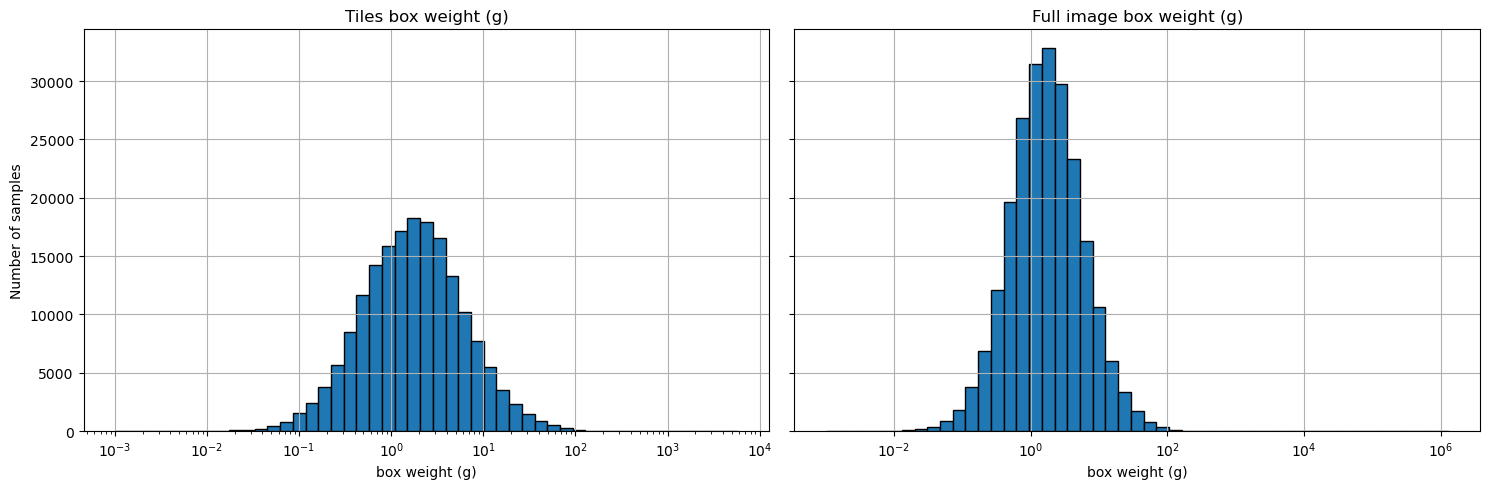

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# scales
def get_log_bins(data, bins=50):
    # Calculate the log10 of the min and max values
    log10_min = np.log10(0.001)
    log10_max = np.log10(data.max())
    # Number of bins
    num_bins = bins
    # Create logarithmically spaced bins
    return np.logspace(log10_min, log10_max, num_bins)

# Histogram for tiled data
data = tile_label_report['box_DL_weight_g_corr']
bins = get_log_bins(data)
axes[0].hist(data, bins=bins, edgecolor='black')
axes[0].set_xscale('log') # Set the x-axis to a logarithmic scale
axes[0].set_title("Tiles box weight (g)")
axes[0].set_xlabel("box weight (g)")
axes[0].set_ylabel("Number of samples")
axes[0].grid(True)

# Histogram for full image data
data = full_lbl_report['box_DL_weight_g_corr']
bins = get_log_bins(data)
axes[1].hist(data, bins=bins, edgecolor='black')
axes[1].set_xscale('log') # Set the x-axis to a logarithmic scale
axes[1].set_title("Full image box weight (g)")
axes[1].set_xlabel("box weight (g)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
run_directory = r"D:\ageglio-1\gobyfinder_yolov8\output\test_runs\Labeled data tiled 2048 HNM"
tiles_directory = r"D:\datasets\tiled\validation\labels"

yolo_pred_path = os.path.join(run_directory, "predictions.csv")
meta_path = os.path.join(run_directory, "metadata.csv")
yolo_lbl_path = os.path.join(run_directory, "labels.csv")


pred_report = pd.read_csv(r"D:\ageglio-1\gobyfinder_yolov8\output\test_runs\Labeled data tiled 2048 HNM\inference_results_0.20.csv")


,Time_s,Filename,MISSION_NAME,LAKE_NAME,Fish_ID,cls,x,y,w,h,...,month,day,time,box_DL_px,box_DL_Cor_px,box_DL_mm,box_DL_mm_corr,box_DL_weight_g,box_DL_weight_g_corr,substrate_class_2c
0,1597146083,PI_1597146082_861_Iver3069_0_0,LM_20_03,Michigan,1.0,0.0,0.059432,0.213034,0.050644,0.060213,...,8,11,7:41:22,115.600863,109.395420,50.489101,43.319692,1.496221,0.912824,NaN
1,1597146083,PI_1597146082_861_Iver3069_0_869,LM_20_03,Michigan,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,8,11,7:41:22,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,NaN
2,1597146083,PI_1597146082_861_Iver3069_1212_0,LM_20_03,Michigan,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,8,11,7:41:22,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,NaN
3,1597146083,PI_1597146082_861_Iver3069_1212_869,LM_20_03,Michigan,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,8,11,7:41:22,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,NaN
4,1597146083,PI_1597146082_861_Iver3069_2424_0,LM_20_03,Michigan,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,8,11,7:41:22,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373903,1694723925,PI_1694723924_574_Iver3069_1212_1693,LM_23_20,Michigan,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,9,14,16:38:44,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,NaN
373904,1694723925,PI_1694723924_574_Iver3069_1212_847,LM_23_20,Michigan,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,9,14,16:38:44,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,NaN
373905,1694723925,PI_1694723924_574_Iver3069_2424_0,LM_23_20,Michigan,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,9,14,16:38:44,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,NaN
373906,1694723925,PI_1694723924_574_Iver3069_2424_1693,LM_23_20,Michigan,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,9,14,16:38:44,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,NaN
